# Unsupervised learning by competing hidden units
 
 ### **Author**
 
 - Gloria Isotton
 - Master degree in Physics of data
 
 ### **Introduction**

This notebook presents an implementation and reproduction of the results from the paper *"Unsupervised Learning by Competing Hidden Units"*, which explores a novel approach to unsupervised learning based on biologically-inspired principles. The paper proposes a bio-inspired learning algorithm that relies on competition among hidden units, aiming to achieve effective unsupervised feature extraction without labels by harnessing anti-Hebbian updates and lateral inhibition among neurons.

In this notebook, we apply the bio-inspired learning algorithm introduced in the paper to three widely recognized datasets: CIFAR-10, MNIST, and Fashion MNIST. For each dataset, we conduct a thorough grid search, varying key parameters—such as rank and the Lebesgue norm—to identify the optimal configuration that maximizes accuracy and minimizes test loss. 

Additionally, the code provided is accompanied by a library that facilitates easy access to all functions and parameters used in the algorithm. This library provides modular and reusable components for further experimentation and testing. Through this notebook, readers can explore the details of the model’s architecture, follow the steps to reproduce the paper’s results, and gain insight into how biologically-inspired learning principles can be applied in unsupervised learning tasks.

In [1]:
# Importing dependencies

import torch
import torchvision
from PIL import Image
from torch import nn,save,load
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split, TensorDataset
import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ExponentialLR
from torch.optim.lr_scheduler import MultiStepLR
from joblib import Parallel, delayed
from itertools import product
import os

# Import all the functions in the bio library
from bio_utils import *

## Dataset loading
Variable containing the dataset name `data_name`:
- `1` : MNIST https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html?ref=hackernoon.com#torchvision.datasets.MNIST <br>
- `2` : CIFAR10 https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html?ref=hackernoon.com#torchvision.datasets.CIFAR10<br>
- `3` : FashionMNIST https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html?ref=hackernoon.com#torchvision.datasets.FashionMNIST<br>

In [19]:
data_name=3

####### MNIST dataset ########
if data_name == 1:
    transform = transforms.Compose([transforms.ToTensor(),
                                   transforms.Lambda(lambda x: x.view(-1))])
    full_train_dataset = datasets.MNIST(root="data", download=True, train=True, transform=transform)

    train_size = 50000
    val_size = 10000
    train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size])

    train_loader = DataLoader(train_dataset, batch_size=28, shuffle=True)
    test_loader = DataLoader(val_dataset, batch_size=28, shuffle=False)

    print(f"Training set size: {len(train_loader.dataset)}")
    print(f"Test set size: {len(test_loader.dataset)}")


####### CIFAR10 dataset ########
if data_name == 2:
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                                   transforms.Lambda(lambda x: x.view(-1))])
    full_train_dataset = datasets.CIFAR10(root="data", download=True, train=True, transform=transform)

    train_size = 40000
    val_size = 10000
    train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size])

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    print(f"Training set size: {len(train_loader.dataset)}")
    print(f"Test set size: {len(test_loader.dataset)}")



####### FASHION MNIST dataset ########
if data_name == 3:
    transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,)),
                                   transforms.Lambda(lambda x: x.view(-1))])

    full_train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True,download=True, transform=transform)
    train_size = 50000
    val_size = 10000
    train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size])

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=28,shuffle=True)
    test_loader = torch.utils.data.DataLoader(val_dataset, batch_size=28,shuffle=False)

    print(f"Training set size: {len(train_loader.dataset)}")
    print(f"Test set size: {len(test_loader.dataset)}")



Training set size: 50000
Test set size: 10000


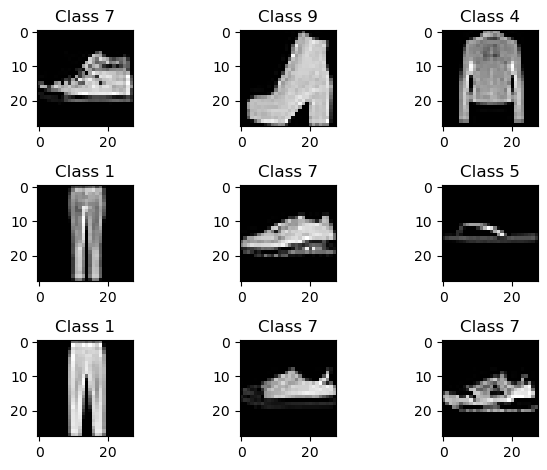

In [20]:
# extract images and labels from training dataset for plotting
X_train = train_dataset.dataset.data
y_train = train_dataset.dataset.targets

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()



# Example usage on Fashion MNIST

## Unsupervised learning part

epoch --> 0
epoch --> 1
epoch --> 2
epoch --> 3
epoch --> 4
epoch --> 5
epoch --> 6
epoch --> 7
epoch --> 8
epoch --> 9
epoch --> 10
epoch --> 11
epoch --> 12
epoch --> 13
epoch --> 14
epoch --> 15
epoch --> 16
epoch --> 17
epoch --> 18
epoch --> 19
epoch --> 20
epoch --> 21
epoch --> 22
epoch --> 23
epoch --> 24
epoch --> 25
epoch --> 26
epoch --> 27
epoch --> 28
epoch --> 29
epoch --> 30
epoch --> 31
epoch --> 32
epoch --> 33
epoch --> 34
epoch --> 35
epoch --> 36
epoch --> 37
epoch --> 38
epoch --> 39
epoch --> 40
epoch --> 41
epoch --> 42
epoch --> 43
epoch --> 44
epoch --> 45
epoch --> 46
epoch --> 47
epoch --> 48
epoch --> 49
epoch --> 50
epoch --> 51
epoch --> 52
epoch --> 53
epoch --> 54
epoch --> 55
epoch --> 56
epoch --> 57
epoch --> 58
epoch --> 59
epoch --> 60
epoch --> 61
epoch --> 62
epoch --> 63
epoch --> 64
epoch --> 65
epoch --> 66
epoch --> 67
epoch --> 68
epoch --> 69
epoch --> 70
epoch --> 71
epoch --> 72
epoch --> 73
epoch --> 74
epoch --> 75
epoch --> 76
epoch -->

epoch --> 594
epoch --> 595
epoch --> 596
epoch --> 597
epoch --> 598
epoch --> 599
epoch --> 600
epoch --> 601
epoch --> 602
epoch --> 603
epoch --> 604
epoch --> 605
epoch --> 606
epoch --> 607
epoch --> 608
epoch --> 609
epoch --> 610
epoch --> 611
epoch --> 612
epoch --> 613
epoch --> 614
epoch --> 615
epoch --> 616
epoch --> 617
epoch --> 618
epoch --> 619
epoch --> 620
epoch --> 621
epoch --> 622
epoch --> 623
epoch --> 624
epoch --> 625
epoch --> 626
epoch --> 627
epoch --> 628
epoch --> 629
epoch --> 630
epoch --> 631
epoch --> 632
epoch --> 633
epoch --> 634
epoch --> 635
epoch --> 636
epoch --> 637
epoch --> 638
epoch --> 639
epoch --> 640
epoch --> 641
epoch --> 642
epoch --> 643
epoch --> 644
epoch --> 645
epoch --> 646
epoch --> 647
epoch --> 648
epoch --> 649
epoch --> 650
epoch --> 651
epoch --> 652
epoch --> 653
epoch --> 654
epoch --> 655
epoch --> 656
epoch --> 657
epoch --> 658
epoch --> 659
epoch --> 660
epoch --> 661
epoch --> 662
epoch --> 663
epoch --> 664
epoch 

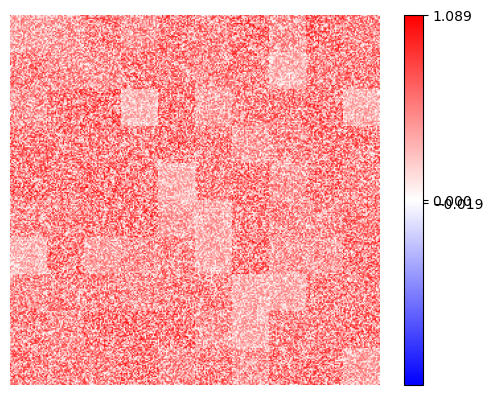

In [8]:
synapses = unsupervised_bio_learning(train_dataset, n_hidden=2000, n_epochs=800, batch_size=1000, 
                              learning_rate=0.01, precision=1e-30, 
                              anti_hebbian_learning_strength=0.2, 
                              lebesgue_norm=2, rank=2, skip = 1)

save_state_weights(synapses, data_name, n_hidden=100, anti_hebbian_learning_strength=0.3, 
                       lebesgue_norm=2, rank=5, Kx=10, Ky=10)

## Supervised learning layer

In [21]:
# Define the training parameters
# Fixed parameters
n_hidden = 2000
n_epochs_unsupervised = 1000
precision = 1e-30
anti_hebbian_learning_strength = 0.2
lebesgue_norm = 2
rank = 2        
batch_size = 28
learning_rate = 0.001
skip = 1
Kx = 10
Ky = 10


# Fixed parameters for supervised learning
out_features = 10
n_epochs_supervised = 100
batch_size_supervised = 28
correct_img_bzs = 28

synapse_file = '/home/gloria/Scrivania/Physical model of living systems/Project/output/BIO ALGORITHM/FASHION MNIST/FASHIONMNIST_biolinear_hidden2000_ahls0.2_lnorm2.0_rank2.npy'
synapses = torch.from_numpy( np.load(synapse_file)) 

In [22]:
synapses.shape

torch.Size([2000, 784])

Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [1/100], Train Loss: 1.9872, Val Loss: 1.9225, Train Acc: 0.7092, Val Acc: 0.7590
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [2/100], Train Loss: 1.9604, Val Loss: 1.9335, Train Acc: 0.7415, Val Acc: 0.7593
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [3/100], Train Loss: 1.9547, Val Loss: 1.9187, Train Acc: 0.7490, Val Acc: 0.7605
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [4/100], Train Loss: 1.9512, Val Loss: 1.9071, Train Acc: 0.7516, Val Acc: 0.7806
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [5/100], Train Loss: 1.9475, Val Loss: 1.9221, Train Acc: 0.7567, Val Acc: 0.7636
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [6/100], Train Loss: 1.9458, Val Loss: 1.9107, Train Acc: 0.7560, Val Acc: 0.7778
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [7/100], Train Loss: 1.9449, Val Loss: 1.9049,

Epoch [56/100], Train Loss: 1.9298, Val Loss: 1.8990, Train Acc: 0.7712, Val Acc: 0.7818
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [57/100], Train Loss: 1.9299, Val Loss: 1.9068, Train Acc: 0.7733, Val Acc: 0.7789
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [58/100], Train Loss: 1.9293, Val Loss: 1.8917, Train Acc: 0.7717, Val Acc: 0.7976
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [59/100], Train Loss: 1.9305, Val Loss: 1.8973, Train Acc: 0.7703, Val Acc: 0.7873
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [60/100], Train Loss: 1.9306, Val Loss: 1.8872, Train Acc: 0.7718, Val Acc: 0.7966
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [61/100], Train Loss: 1.9294, Val Loss: 1.8837, Train Acc: 0.7708, Val Acc: 0.7957
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [62/100], Train Loss: 1.9300, Val Loss: 1.8873, Train Acc: 0.7711, Val Acc: 0.7948
Batch scartato pe

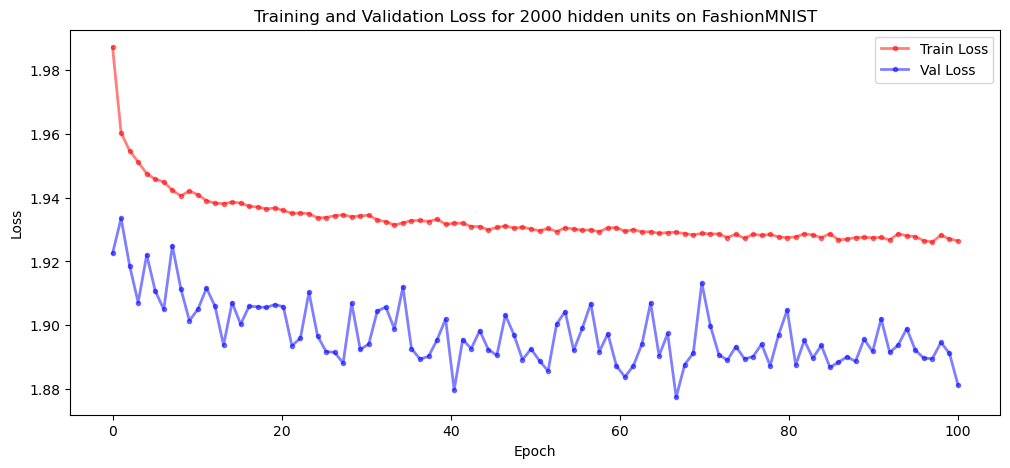

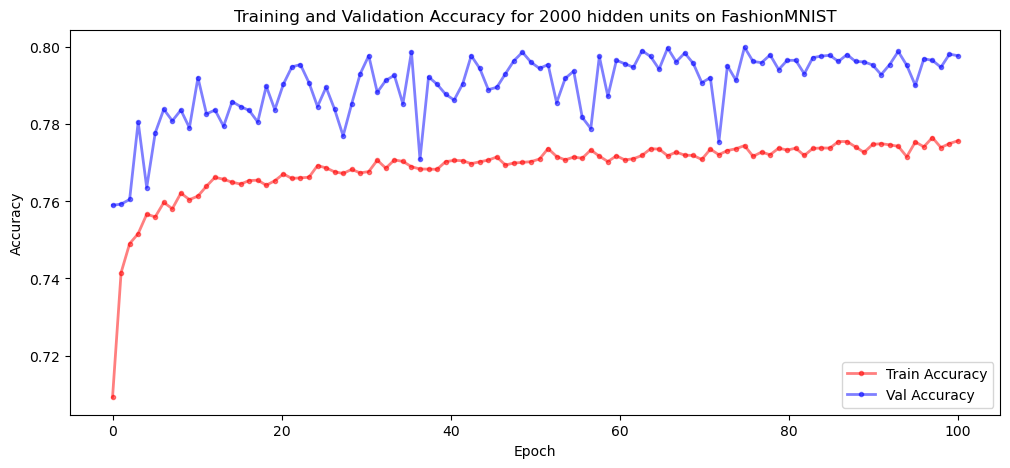

In [23]:

# Train the model
train_loss_log, val_loss_log, train_acc_log, val_acc_log = train_bio_classifier(
    W_unsupervised=synapses, 
    train_loader=train_loader, 
    val_loader=test_loader, 
    correct_img_bzs=correct_img_bzs,
    data_name=data_name,
    n_hidden=n_hidden, 
    out_features=out_features, 
    n_epochs=n_epochs_supervised, 
    batch_size=batch_size_supervised,
    anti_hebbian_learning_strength=anti_hebbian_learning_strength, 
    lebesgue_norm=lebesgue_norm, 
    rank=rank
)
    

# Grid search

We fixed all the model parameters except for the rank and the Lebesgue norm and conducted a grid search to identify the combination of values that optimizes accuracy and minimizes loss on the test set. The fixed parameters include the number of hidden layers in the unsupervised phase, the learning rate in the supervised phase, and the strength of anti-Hebbian learning. This process was repeated for each of the three datasets analyzed.


### MNIST

epoch --> 0
epoch --> 1
epoch --> 2
epoch --> 3
epoch --> 4
epoch --> 5
epoch --> 6
epoch --> 7
epoch --> 8
epoch --> 9
epoch --> 10
epoch --> 11
epoch --> 12
epoch --> 13
epoch --> 14
epoch --> 15
epoch --> 16
epoch --> 17
epoch --> 18
epoch --> 19
epoch --> 20
epoch --> 21
epoch --> 22
epoch --> 23
epoch --> 24
epoch --> 25
epoch --> 26
epoch --> 27
epoch --> 28
epoch --> 29
epoch --> 30
epoch --> 31
epoch --> 32
epoch --> 33
epoch --> 34
epoch --> 35
epoch --> 36
epoch --> 37
epoch --> 38
epoch --> 39
epoch --> 40
epoch --> 41
epoch --> 42
epoch --> 43
epoch --> 44
epoch --> 45
epoch --> 46
epoch --> 47
epoch --> 48
epoch --> 49
File torch salvato come: output/MNIST_biolinear_hidden200_ahls0.4_lnorm2_rank2.pt
Figura salvata come: output/MNIST_biolinear_hidden200_ahls0.4_lnorm2_rank2.png
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [1/80], Train Loss: 1.9770, Val Loss: 1.9459, Train Acc: 0.7840, Val Acc: 0.8182
Batch scartato per dimensione errata: torch.Size([20

epoch --> 0
epoch --> 1
epoch --> 2
epoch --> 3
epoch --> 4
epoch --> 5
epoch --> 6
epoch --> 7
epoch --> 8
epoch --> 9
epoch --> 10
epoch --> 11
epoch --> 12
epoch --> 13
epoch --> 14
epoch --> 15
epoch --> 16
epoch --> 17
epoch --> 18
epoch --> 19
epoch --> 20
epoch --> 21
epoch --> 22
epoch --> 23
epoch --> 24
epoch --> 25
epoch --> 26
epoch --> 27
epoch --> 28
epoch --> 29
epoch --> 30
epoch --> 31
epoch --> 32
epoch --> 33
epoch --> 34
epoch --> 35
epoch --> 36
epoch --> 37
epoch --> 38
epoch --> 39
epoch --> 40
epoch --> 41
epoch --> 42
epoch --> 43
epoch --> 44
epoch --> 45
epoch --> 46
epoch --> 47
epoch --> 48
epoch --> 49
File torch salvato come: output/MNIST_biolinear_hidden200_ahls0.4_lnorm2_rank5.pt
Figura salvata come: output/MNIST_biolinear_hidden200_ahls0.4_lnorm2_rank5.png
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [1/80], Train Loss: 1.9780, Val Loss: 1.9350, Train Acc: 0.7830, Val Acc: 0.8171
Batch scartato per dimensione errata: torch.Size([20

epoch --> 0
epoch --> 1
epoch --> 2
epoch --> 3
epoch --> 4
epoch --> 5
epoch --> 6
epoch --> 7
epoch --> 8
epoch --> 9
epoch --> 10
epoch --> 11
epoch --> 12
epoch --> 13
epoch --> 14
epoch --> 15
epoch --> 16
epoch --> 17
epoch --> 18
epoch --> 19
epoch --> 20
epoch --> 21
epoch --> 22
epoch --> 23
epoch --> 24
epoch --> 25
epoch --> 26
epoch --> 27
epoch --> 28
epoch --> 29
epoch --> 30
epoch --> 31
epoch --> 32
epoch --> 33
epoch --> 34
epoch --> 35
epoch --> 36
epoch --> 37
epoch --> 38
epoch --> 39
epoch --> 40
epoch --> 41
epoch --> 42
epoch --> 43
epoch --> 44
epoch --> 45
epoch --> 46
epoch --> 47
epoch --> 48
epoch --> 49
File torch salvato come: output/MNIST_biolinear_hidden200_ahls0.4_lnorm4_rank5.pt
Figura salvata come: output/MNIST_biolinear_hidden200_ahls0.4_lnorm4_rank5.png
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [1/80], Train Loss: 1.9763, Val Loss: 1.9283, Train Acc: 0.7848, Val Acc: 0.7977
Batch scartato per dimensione errata: torch.Size([20

epoch --> 0
epoch --> 1
epoch --> 2
epoch --> 3
epoch --> 4
epoch --> 5
epoch --> 6
epoch --> 7
epoch --> 8
epoch --> 9
epoch --> 10
epoch --> 11
epoch --> 12
epoch --> 13
epoch --> 14
epoch --> 15
epoch --> 16
epoch --> 17
epoch --> 18
epoch --> 19
epoch --> 20
epoch --> 21
epoch --> 22
epoch --> 23
epoch --> 24
epoch --> 25
epoch --> 26
epoch --> 27
epoch --> 28
epoch --> 29
epoch --> 30
epoch --> 31
epoch --> 32
epoch --> 33
epoch --> 34
epoch --> 35
epoch --> 36
epoch --> 37
epoch --> 38
epoch --> 39
epoch --> 40
epoch --> 41
epoch --> 42
epoch --> 43
epoch --> 44
epoch --> 45
epoch --> 46
epoch --> 47
epoch --> 48
epoch --> 49
File torch salvato come: output/MNIST_biolinear_hidden200_ahls0.4_lnorm4_rank7.pt
Figura salvata come: output/MNIST_biolinear_hidden200_ahls0.4_lnorm4_rank7.png
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [1/80], Train Loss: 1.9760, Val Loss: 1.9343, Train Acc: 0.7838, Val Acc: 0.8163
Batch scartato per dimensione errata: torch.Size([20

Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [51/80], Train Loss: 1.9425, Val Loss: 1.9066, Train Acc: 0.8128, Val Acc: 0.8397
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [52/80], Train Loss: 1.9421, Val Loss: 1.9074, Train Acc: 0.8156, Val Acc: 0.8363
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [53/80], Train Loss: 1.9429, Val Loss: 1.9106, Train Acc: 0.8150, Val Acc: 0.8416
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [54/80], Train Loss: 1.9423, Val Loss: 1.9122, Train Acc: 0.8181, Val Acc: 0.8328
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [55/80], Train Loss: 1.9419, Val Loss: 1.9066, Train Acc: 0.8157, Val Acc: 0.8472
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [56/80], Train Loss: 1.9418, Val Loss: 1.9141, Train Acc: 0.8157, Val Acc: 0.8459
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [57/80], Train Loss: 1.9416, Val Loss: 1.9173,

Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [51/80], Train Loss: 1.9423, Val Loss: 1.9165, Train Acc: 0.8144, Val Acc: 0.8490
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [52/80], Train Loss: 1.9420, Val Loss: 1.9047, Train Acc: 0.8173, Val Acc: 0.8367
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [53/80], Train Loss: 1.9416, Val Loss: 1.9101, Train Acc: 0.8168, Val Acc: 0.8345
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [54/80], Train Loss: 1.9425, Val Loss: 1.9097, Train Acc: 0.8136, Val Acc: 0.8421
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [55/80], Train Loss: 1.9417, Val Loss: 1.9115, Train Acc: 0.8161, Val Acc: 0.8451
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [56/80], Train Loss: 1.9421, Val Loss: 1.9078, Train Acc: 0.8160, Val Acc: 0.8475
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [57/80], Train Loss: 1.9417, Val Loss: 1.9009,

Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [51/80], Train Loss: 1.9424, Val Loss: 1.9096, Train Acc: 0.8148, Val Acc: 0.8393
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [52/80], Train Loss: 1.9429, Val Loss: 1.9138, Train Acc: 0.8136, Val Acc: 0.8307
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [53/80], Train Loss: 1.9429, Val Loss: 1.9090, Train Acc: 0.8141, Val Acc: 0.8343
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [54/80], Train Loss: 1.9424, Val Loss: 1.9148, Train Acc: 0.8157, Val Acc: 0.8428
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [55/80], Train Loss: 1.9419, Val Loss: 1.9213, Train Acc: 0.8157, Val Acc: 0.8448
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [56/80], Train Loss: 1.9422, Val Loss: 1.9111, Train Acc: 0.8139, Val Acc: 0.8346
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [57/80], Train Loss: 1.9429, Val Loss: 1.9045,

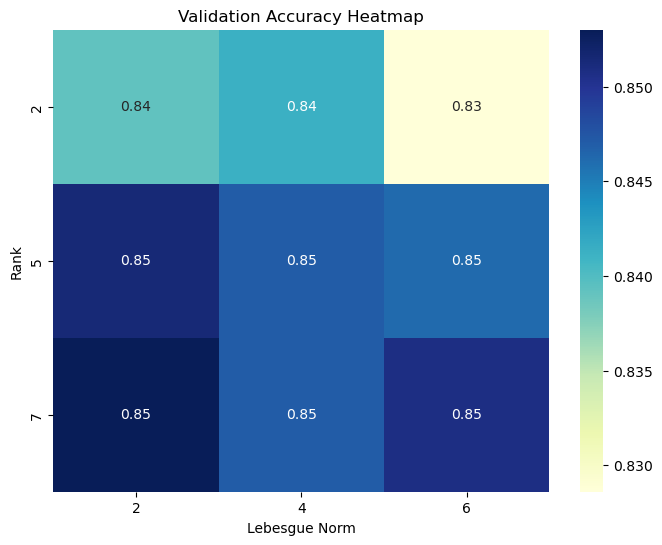

Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [51/80], Train Loss: 1.9425, Val Loss: 1.9019, Train Acc: 0.8137, Val Acc: 0.8339
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [52/80], Train Loss: 1.9423, Val Loss: 1.9221, Train Acc: 0.8159, Val Acc: 0.8293
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [53/80], Train Loss: 1.9417, Val Loss: 1.9110, Train Acc: 0.8155, Val Acc: 0.8484
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [54/80], Train Loss: 1.9419, Val Loss: 1.9166, Train Acc: 0.8166, Val Acc: 0.8357
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [55/80], Train Loss: 1.9415, Val Loss: 1.9069, Train Acc: 0.8157, Val Acc: 0.8554
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [56/80], Train Loss: 1.9423, Val Loss: 1.9117, Train Acc: 0.8166, Val Acc: 0.8483
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [57/80], Train Loss: 1.9427, Val Loss: 1.9114,

Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [51/80], Train Loss: 1.9414, Val Loss: 1.9146, Train Acc: 0.8178, Val Acc: 0.8488
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [52/80], Train Loss: 1.9423, Val Loss: 1.9124, Train Acc: 0.8154, Val Acc: 0.8491
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [53/80], Train Loss: 1.9421, Val Loss: 1.9050, Train Acc: 0.8165, Val Acc: 0.8446
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [54/80], Train Loss: 1.9419, Val Loss: 1.9090, Train Acc: 0.8143, Val Acc: 0.8457
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [55/80], Train Loss: 1.9407, Val Loss: 1.9093, Train Acc: 0.8162, Val Acc: 0.8335
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [56/80], Train Loss: 1.9410, Val Loss: 1.9061, Train Acc: 0.8140, Val Acc: 0.8517
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [57/80], Train Loss: 1.9412, Val Loss: 1.9129,

In [4]:

# Define the parameter grid
lebesgue_norm_values = [2, 4, 6]  
rank_values = [2, 5, 7]           

# Fixed parameters
n_hidden = 200
n_epochs_unsupervised = 50
batch_size = 28
learning_rate = 0.01
precision = 0.1
anti_hebbian_learning_strength = 0.4
skip = 1
Kx = 10
Ky = 10


# Fixed parameters for supervised learning
out_features = 10
n_epochs_supervised = 80
batch_size_supervised = 28
correct_img_bzs = 28

# Prepare a 2D array to hold accuracy values
accuracy_matrix = np.zeros((len(rank_values), len(lebesgue_norm_values)))

# Function to run unsupervised training and then supervised training for each combination
def run_supervised(lebesgue_norm, rank):
    
    # Unsupervised learning phase
    synapses = unsupervised_bio_learning(
        train_dataset, 
        n_hidden=n_hidden, 
        n_epochs=n_epochs_unsupervised, 
        batch_size=batch_size, 
        learning_rate=learning_rate, 
        precision=precision, 
        anti_hebbian_learning_strength=anti_hebbian_learning_strength, 
        skip=skip
    )
    
    # Save the synapses with the current parameters
    save_state_weights(
        synapses, 
        data_name, 
        n_hidden=n_hidden, 
        anti_hebbian_learning_strength=anti_hebbian_learning_strength, 
        lebesgue_norm=lebesgue_norm, 
        rank=rank, 
        Kx=Kx, 
        Ky=Ky
    )
    # Supervised learning phase
    train_loss_log, val_loss_log, train_acc_log, val_acc_log = train_bio_classifier(
        W_unsupervised=synapses, 
        train_loader=train_loader, 
        val_loader=test_loader, 
        correct_img_bzs=correct_img_bzs,
        data_name=data_name,
        n_hidden=n_hidden, 
        out_features=out_features, 
        n_epochs=n_epochs_supervised, 
        batch_size=batch_size_supervised,
        anti_hebbian_learning_strength=anti_hebbian_learning_strength, 
        lebesgue_norm=lebesgue_norm, 
        rank=rank
    )
    
    
    # Calculate final validation accuracy and return it along with parameters for logging
    final_val_accuracy = val_acc_log[-1]  # Get the last recorded validation accuracy
    return lebesgue_norm, rank, final_val_accuracy

# Prepare all parameter combinations
param_combinations = list(product(lebesgue_norm_values, rank_values))

# Run the full pipeline in parallel using 4 cores and collect the accuracy results
results = Parallel(n_jobs=8)(delayed(run_supervised)(lebesgue_norm, rank) for lebesgue_norm, rank in param_combinations)

# Populate the accuracy_matrix based on results
for lebesgue_norm, rank, final_val_accuracy in results:
    x_idx = lebesgue_norm_values.index(lebesgue_norm)
    y_idx = rank_values.index(rank)
    accuracy_matrix[y_idx, x_idx] = final_val_accuracy  # Fill in matrix with accuracy values

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    accuracy_matrix, 
    xticklabels=lebesgue_norm_values, 
    yticklabels=rank_values, 
    annot=True, 
    cmap="YlGnBu"
)
plt.xlabel("Lebesgue Norm")
plt.ylabel("Rank")
plt.title("Validation Accuracy Heatmap")
plt.savefig(f"Accuracy {data_name}")
plt.show()

### FASHION MNIST

epoch --> 0
epoch --> 1
epoch --> 2
epoch --> 3
epoch --> 4
epoch --> 5
epoch --> 6
epoch --> 7
epoch --> 8
epoch --> 9
epoch --> 10
epoch --> 11
epoch --> 12
epoch --> 13
epoch --> 14
epoch --> 15
epoch --> 16
epoch --> 17
epoch --> 18
epoch --> 19
epoch --> 20
epoch --> 21
epoch --> 22
epoch --> 23
epoch --> 24
epoch --> 25
epoch --> 26
epoch --> 27
epoch --> 28
epoch --> 29
epoch --> 30
epoch --> 31
epoch --> 32
epoch --> 33
epoch --> 34
epoch --> 35
epoch --> 36
epoch --> 37
epoch --> 38
epoch --> 39
epoch --> 40
epoch --> 41
epoch --> 42
epoch --> 43
epoch --> 44
epoch --> 45
epoch --> 46
epoch --> 47
epoch --> 48
epoch --> 49
File torch salvato come: output/FashionMNIST_biolinear_hidden200_ahls0.4_lnorm2_rank5.pt
Figura salvata come: output/FashionMNIST_biolinear_hidden200_ahls0.4_lnorm2_rank5.png
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [1/80], Train Loss: 2.2282, Val Loss: 2.1610, Train Acc: 0.4017, Val Acc: 0.3745
Batch scartato per dimensione errata: 

epoch --> 0
epoch --> 1
epoch --> 2
epoch --> 3
epoch --> 4
epoch --> 5
epoch --> 6
epoch --> 7
epoch --> 8
epoch --> 9
epoch --> 10
epoch --> 11
epoch --> 12
epoch --> 13
epoch --> 14
epoch --> 15
epoch --> 16
epoch --> 17
epoch --> 18
epoch --> 19
epoch --> 20
epoch --> 21
epoch --> 22
epoch --> 23
epoch --> 24
epoch --> 25
epoch --> 26
epoch --> 27
epoch --> 28
epoch --> 29
epoch --> 30
epoch --> 31
epoch --> 32
epoch --> 33
epoch --> 34
epoch --> 35
epoch --> 36
epoch --> 37
epoch --> 38
epoch --> 39
epoch --> 40
epoch --> 41
epoch --> 42
epoch --> 43
epoch --> 44
epoch --> 45
epoch --> 46
epoch --> 47
epoch --> 48
epoch --> 49
File torch salvato come: output/FashionMNIST_biolinear_hidden200_ahls0.4_lnorm4_rank2.pt
Figura salvata come: output/FashionMNIST_biolinear_hidden200_ahls0.4_lnorm4_rank2.png
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [1/80], Train Loss: 2.2338, Val Loss: 2.1744, Train Acc: 0.3975, Val Acc: 0.3436
Batch scartato per dimensione errata: 

epoch --> 0
epoch --> 1
epoch --> 2
epoch --> 3
epoch --> 4
epoch --> 5
epoch --> 6
epoch --> 7
epoch --> 8
epoch --> 9
epoch --> 10
epoch --> 11
epoch --> 12
epoch --> 13
epoch --> 14
epoch --> 15
epoch --> 16
epoch --> 17
epoch --> 18
epoch --> 19
epoch --> 20
epoch --> 21
epoch --> 22
epoch --> 23
epoch --> 24
epoch --> 25
epoch --> 26
epoch --> 27
epoch --> 28
epoch --> 29
epoch --> 30
epoch --> 31
epoch --> 32
epoch --> 33
epoch --> 34
epoch --> 35
epoch --> 36
epoch --> 37
epoch --> 38
epoch --> 39
epoch --> 40
epoch --> 41
epoch --> 42
epoch --> 43
epoch --> 44
epoch --> 45
epoch --> 46
epoch --> 47
epoch --> 48
epoch --> 49
File torch salvato come: output/FashionMNIST_biolinear_hidden200_ahls0.4_lnorm6_rank5.pt
Figura salvata come: output/FashionMNIST_biolinear_hidden200_ahls0.4_lnorm6_rank5.png
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [1/80], Train Loss: 2.2283, Val Loss: 2.1701, Train Acc: 0.3973, Val Acc: 0.3734
Batch scartato per dimensione errata: 

epoch --> 0
epoch --> 1
epoch --> 2
epoch --> 3
epoch --> 4
epoch --> 5
epoch --> 6
epoch --> 7
epoch --> 8
epoch --> 9
epoch --> 10
epoch --> 11
epoch --> 12
epoch --> 13
epoch --> 14
epoch --> 15
epoch --> 16
epoch --> 17
epoch --> 18
epoch --> 19
epoch --> 20
epoch --> 21
epoch --> 22
epoch --> 23
epoch --> 24
epoch --> 25
epoch --> 26
epoch --> 27
epoch --> 28
epoch --> 29
epoch --> 30
epoch --> 31
epoch --> 32
epoch --> 33
epoch --> 34
epoch --> 35
epoch --> 36
epoch --> 37
epoch --> 38
epoch --> 39
epoch --> 40
epoch --> 41
epoch --> 42
epoch --> 43
epoch --> 44
epoch --> 45
epoch --> 46
epoch --> 47
epoch --> 48
epoch --> 49
File torch salvato come: output/FashionMNIST_biolinear_hidden200_ahls0.4_lnorm2_rank7.pt
Figura salvata come: output/FashionMNIST_biolinear_hidden200_ahls0.4_lnorm2_rank7.png
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [1/80], Train Loss: 2.2069, Val Loss: 2.1876, Train Acc: 0.4151, Val Acc: 0.3887
Batch scartato per dimensione errata: 

Epoch [50/80], Train Loss: 1.9625, Val Loss: 1.9623, Train Acc: 0.7454, Val Acc: 0.6910
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [51/80], Train Loss: 1.9614, Val Loss: 2.0105, Train Acc: 0.7450, Val Acc: 0.5497
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [52/80], Train Loss: 1.9608, Val Loss: 1.9362, Train Acc: 0.7477, Val Acc: 0.7637
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [53/80], Train Loss: 1.9604, Val Loss: 1.9509, Train Acc: 0.7471, Val Acc: 0.7462
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [54/80], Train Loss: 1.9596, Val Loss: 1.9544, Train Acc: 0.7485, Val Acc: 0.7106
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [55/80], Train Loss: 1.9593, Val Loss: 1.9724, Train Acc: 0.7452, Val Acc: 0.6630
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [56/80], Train Loss: 1.9601, Val Loss: 1.9452, Train Acc: 0.7479, Val Acc: 0.6874
Batch scartato per dimen

Epoch [50/80], Train Loss: 1.9630, Val Loss: 2.0001, Train Acc: 0.7441, Val Acc: 0.5908
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [51/80], Train Loss: 1.9646, Val Loss: 1.9408, Train Acc: 0.7432, Val Acc: 0.7221
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [52/80], Train Loss: 1.9644, Val Loss: 1.9575, Train Acc: 0.7439, Val Acc: 0.7385
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [53/80], Train Loss: 1.9637, Val Loss: 1.9490, Train Acc: 0.7456, Val Acc: 0.6874
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [54/80], Train Loss: 1.9613, Val Loss: 1.9748, Train Acc: 0.7457, Val Acc: 0.7336
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [55/80], Train Loss: 1.9643, Val Loss: 1.9436, Train Acc: 0.7442, Val Acc: 0.7534
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [56/80], Train Loss: 1.9625, Val Loss: 1.9523, Train Acc: 0.7491, Val Acc: 0.7747
Batch scartato per dimen

Epoch [50/80], Train Loss: 1.9627, Val Loss: 1.9488, Train Acc: 0.7472, Val Acc: 0.7459
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [51/80], Train Loss: 1.9615, Val Loss: 1.9612, Train Acc: 0.7472, Val Acc: 0.6837
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [52/80], Train Loss: 1.9622, Val Loss: 1.9728, Train Acc: 0.7478, Val Acc: 0.7176
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [53/80], Train Loss: 1.9627, Val Loss: 1.9561, Train Acc: 0.7487, Val Acc: 0.7161
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [54/80], Train Loss: 1.9604, Val Loss: 1.9240, Train Acc: 0.7501, Val Acc: 0.7384
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [55/80], Train Loss: 1.9617, Val Loss: 1.9565, Train Acc: 0.7480, Val Acc: 0.7154
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [56/80], Train Loss: 1.9595, Val Loss: 1.9296, Train Acc: 0.7503, Val Acc: 0.7415
Batch scartato per dimen

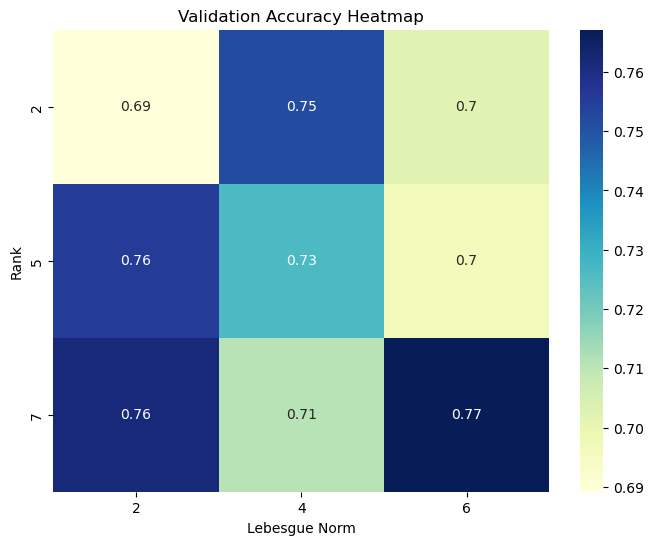

Epoch [50/80], Train Loss: 1.9626, Val Loss: 1.9391, Train Acc: 0.7484, Val Acc: 0.7699
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [51/80], Train Loss: 1.9632, Val Loss: 2.0179, Train Acc: 0.7475, Val Acc: 0.5552
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [52/80], Train Loss: 1.9625, Val Loss: 1.9270, Train Acc: 0.7492, Val Acc: 0.7324
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [53/80], Train Loss: 1.9623, Val Loss: 1.9183, Train Acc: 0.7486, Val Acc: 0.7576
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [54/80], Train Loss: 1.9613, Val Loss: 1.9595, Train Acc: 0.7496, Val Acc: 0.6992
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [55/80], Train Loss: 1.9629, Val Loss: 1.9350, Train Acc: 0.7487, Val Acc: 0.7184
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [56/80], Train Loss: 1.9622, Val Loss: 1.9313, Train Acc: 0.7470, Val Acc: 0.7425
Batch scartato per dimen

Epoch [50/80], Train Loss: 1.9587, Val Loss: 1.9487, Train Acc: 0.7476, Val Acc: 0.7033
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [51/80], Train Loss: 1.9580, Val Loss: 1.9395, Train Acc: 0.7483, Val Acc: 0.7219
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [52/80], Train Loss: 1.9585, Val Loss: 1.9595, Train Acc: 0.7481, Val Acc: 0.7228
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [53/80], Train Loss: 1.9584, Val Loss: 1.9356, Train Acc: 0.7460, Val Acc: 0.7611
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [54/80], Train Loss: 1.9578, Val Loss: 1.9694, Train Acc: 0.7485, Val Acc: 0.6423
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [55/80], Train Loss: 1.9592, Val Loss: 1.9539, Train Acc: 0.7464, Val Acc: 0.6788
Batch scartato per dimensione errata: torch.Size([20, 784])
Epoch [56/80], Train Loss: 1.9571, Val Loss: 1.9325, Train Acc: 0.7467, Val Acc: 0.7509
Batch scartato per dimen

In [6]:

# Define the parameter grid
lebesgue_norm_values = [2, 4, 6]  
rank_values = [2, 5, 7]           

# Fixed parameters
n_hidden = 200
n_epochs_unsupervised = 50
batch_size = 28
learning_rate = 0.01
precision = 0.1
anti_hebbian_learning_strength = 0.4
skip = 1
Kx = 10
Ky = 10


# Fixed parameters for supervised learning
out_features = 10
n_epochs_supervised = 80
batch_size_supervised = 28
correct_img_bzs = 28

# Prepare a 2D array to hold accuracy values
accuracy_matrix = np.zeros((len(rank_values), len(lebesgue_norm_values)))

# Function to run unsupervised training and then supervised training for each combination
def run_supervised(lebesgue_norm, rank):
    
    # Unsupervised learning phase
    synapses = unsupervised_bio_learning(
        train_dataset, 
        n_hidden=n_hidden, 
        n_epochs=n_epochs_unsupervised, 
        batch_size=batch_size, 
        learning_rate=learning_rate, 
        precision=precision, 
        anti_hebbian_learning_strength=anti_hebbian_learning_strength, 
        skip=skip
    )
    
    # Save the synapses with the current parameters
    save_state_weights(
        synapses, 
        data_name, 
        n_hidden=n_hidden, 
        anti_hebbian_learning_strength=anti_hebbian_learning_strength, 
        lebesgue_norm=lebesgue_norm, 
        rank=rank, 
        Kx=Kx, 
        Ky=Ky
    )
    # Supervised learning phase
    train_loss_log, val_loss_log, train_acc_log, val_acc_log = train_bio_classifier(
        W_unsupervised=synapses, 
        train_loader=train_loader, 
        val_loader=test_loader, 
        correct_img_bzs=correct_img_bzs,
        data_name=data_name,
        n_hidden=n_hidden, 
        out_features=out_features, 
        n_epochs=n_epochs_supervised, 
        batch_size=batch_size_supervised,
        anti_hebbian_learning_strength=anti_hebbian_learning_strength, 
        lebesgue_norm=lebesgue_norm, 
        rank=rank
    )
    
    
    # Calculate final validation accuracy and return it along with parameters for logging
    final_val_accuracy = val_acc_log[-1]  # Get the last recorded validation accuracy
    return lebesgue_norm, rank, final_val_accuracy

# Prepare all parameter combinations
param_combinations = list(product(lebesgue_norm_values, rank_values))

# Run the full pipeline in parallel using 4 cores and collect the accuracy results
results = Parallel(n_jobs=8)(delayed(run_supervised)(lebesgue_norm, rank) for lebesgue_norm, rank in param_combinations)

# Populate the accuracy_matrix based on results
for lebesgue_norm, rank, final_val_accuracy in results:
    x_idx = lebesgue_norm_values.index(lebesgue_norm)
    y_idx = rank_values.index(rank)
    accuracy_matrix[y_idx, x_idx] = final_val_accuracy  # Fill in matrix with accuracy values

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    accuracy_matrix, 
    xticklabels=lebesgue_norm_values, 
    yticklabels=rank_values, 
    annot=True, 
    cmap="YlGnBu"
)
plt.xlabel("Lebesgue Norm")
plt.ylabel("Rank")
plt.title("Validation Accuracy Heatmap")
plt.savefig(f"Accuracy {data_name}")
plt.show()

### CIFAR10

Loading synapses from /home/gloria/Scrivania/Physical model of living systems/Project/output/CIFAR10/CIFAR10_biolinear_hidden2000_ahls0.2_lnorm6.0_rank7.npy
True
Epoch [1/50], Train Loss: 2.2147, Val Loss: 2.2031, Train Acc: 0.3165, Val Acc: 0.3349
Epoch [2/50], Train Loss: 2.1983, Val Loss: 2.1938, Train Acc: 0.3507, Val Acc: 0.3499
Epoch [3/50], Train Loss: 2.1946, Val Loss: 2.1903, Train Acc: 0.3598, Val Acc: 0.3624
Epoch [4/50], Train Loss: 2.1917, Val Loss: 2.1853, Train Acc: 0.3647, Val Acc: 0.3811
Epoch [5/50], Train Loss: 2.1905, Val Loss: 2.1816, Train Acc: 0.3661, Val Acc: 0.3756
Epoch [6/50], Train Loss: 2.1890, Val Loss: 2.1846, Train Acc: 0.3690, Val Acc: 0.3684
Epoch [7/50], Train Loss: 2.1881, Val Loss: 2.1823, Train Acc: 0.3699, Val Acc: 0.3733
Epoch [8/50], Train Loss: 2.1873, Val Loss: 2.1836, Train Acc: 0.3728, Val Acc: 0.3739
Epoch [9/50], Train Loss: 2.1866, Val Loss: 2.1833, Train Acc: 0.3764, Val Acc: 0.3691
Epoch [10/50], Train Loss: 2.1858, Val Loss: 2.1769, Tr

Loading synapses from /home/gloria/Scrivania/Physical model of living systems/Project/output/CIFAR10/CIFAR10_biolinear_hidden2000_ahls0.2_lnorm6.0_rank5.npy
True
Epoch [1/100], Train Loss: 2.2186, Val Loss: 2.2022, Train Acc: 0.3079, Val Acc: 0.3400
Epoch [2/100], Train Loss: 2.2019, Val Loss: 2.1957, Train Acc: 0.3422, Val Acc: 0.3572
Epoch [3/100], Train Loss: 2.1976, Val Loss: 2.1926, Train Acc: 0.3544, Val Acc: 0.3589
Epoch [4/100], Train Loss: 2.1950, Val Loss: 2.1924, Train Acc: 0.3569, Val Acc: 0.3696
Epoch [5/100], Train Loss: 2.1933, Val Loss: 2.1897, Train Acc: 0.3643, Val Acc: 0.3593
Epoch [6/100], Train Loss: 2.1922, Val Loss: 2.1865, Train Acc: 0.3645, Val Acc: 0.3718
Epoch [7/100], Train Loss: 2.1907, Val Loss: 2.1917, Train Acc: 0.3674, Val Acc: 0.3671
Epoch [8/100], Train Loss: 2.1899, Val Loss: 2.1885, Train Acc: 0.3686, Val Acc: 0.3707
Epoch [9/100], Train Loss: 2.1889, Val Loss: 2.1849, Train Acc: 0.3679, Val Acc: 0.3651
Epoch [10/100], Train Loss: 2.1881, Val Loss: 

Loading synapses from /home/gloria/Scrivania/Physical model of living systems/Project/output/CIFAR10/CIFAR10_biolinear_hidden2000_ahls0.2_lnorm2.0_rank7.npy
True
Epoch [1/100], Train Loss: 2.2452, Val Loss: 2.2284, Train Acc: 0.2622, Val Acc: 0.2766
Epoch [2/100], Train Loss: 2.2165, Val Loss: 2.2045, Train Acc: 0.3201, Val Acc: 0.3410
Epoch [3/100], Train Loss: 2.2083, Val Loss: 2.2031, Train Acc: 0.3345, Val Acc: 0.3424
Epoch [4/100], Train Loss: 2.2057, Val Loss: 2.2091, Train Acc: 0.3412, Val Acc: 0.3343
Epoch [5/100], Train Loss: 2.2019, Val Loss: 2.2038, Train Acc: 0.3483, Val Acc: 0.3373
Epoch [6/100], Train Loss: 2.2003, Val Loss: 2.2025, Train Acc: 0.3514, Val Acc: 0.3466
Epoch [7/100], Train Loss: 2.1982, Val Loss: 2.1984, Train Acc: 0.3547, Val Acc: 0.3392
Epoch [8/100], Train Loss: 2.1976, Val Loss: 2.1947, Train Acc: 0.3540, Val Acc: 0.3467
Epoch [9/100], Train Loss: 2.1969, Val Loss: 2.1927, Train Acc: 0.3562, Val Acc: 0.3575
Epoch [10/100], Train Loss: 2.1963, Val Loss: 

Loading synapses from /home/gloria/Scrivania/Physical model of living systems/Project/output/CIFAR10/CIFAR10_biolinear_hidden2000_ahls0.2_lnorm6.0_rank2.npy
True
Epoch [1/100], Train Loss: 2.2201, Val Loss: 2.2048, Train Acc: 0.3053, Val Acc: 0.3323
Epoch [2/100], Train Loss: 2.2059, Val Loss: 2.2021, Train Acc: 0.3377, Val Acc: 0.3405
Epoch [3/100], Train Loss: 2.2014, Val Loss: 2.1945, Train Acc: 0.3423, Val Acc: 0.3598
Epoch [4/100], Train Loss: 2.1995, Val Loss: 2.1889, Train Acc: 0.3507, Val Acc: 0.3557
Epoch [5/100], Train Loss: 2.1970, Val Loss: 2.1934, Train Acc: 0.3543, Val Acc: 0.3535
Epoch [6/100], Train Loss: 2.1947, Val Loss: 2.1896, Train Acc: 0.3600, Val Acc: 0.3669
Epoch [7/100], Train Loss: 2.1939, Val Loss: 2.1922, Train Acc: 0.3587, Val Acc: 0.3586
Epoch [8/100], Train Loss: 2.1931, Val Loss: 2.1868, Train Acc: 0.3629, Val Acc: 0.3727
Epoch [9/100], Train Loss: 2.1923, Val Loss: 2.1880, Train Acc: 0.3635, Val Acc: 0.3781
Epoch [10/100], Train Loss: 2.1907, Val Loss: 

Epoch [39/100], Train Loss: 2.1890, Val Loss: 2.1828, Train Acc: 0.3700, Val Acc: 0.3685
Epoch [40/100], Train Loss: 2.1888, Val Loss: 2.1828, Train Acc: 0.3694, Val Acc: 0.3853
Epoch [41/100], Train Loss: 2.1887, Val Loss: 2.1824, Train Acc: 0.3682, Val Acc: 0.3797
Epoch [42/100], Train Loss: 2.1882, Val Loss: 2.1820, Train Acc: 0.3697, Val Acc: 0.3738
Epoch [43/100], Train Loss: 2.1882, Val Loss: 2.1844, Train Acc: 0.3718, Val Acc: 0.3650
Epoch [44/100], Train Loss: 2.1883, Val Loss: 2.1842, Train Acc: 0.3695, Val Acc: 0.3772
Epoch [45/100], Train Loss: 2.1886, Val Loss: 2.1860, Train Acc: 0.3712, Val Acc: 0.3637
Epoch [46/100], Train Loss: 2.1883, Val Loss: 2.1787, Train Acc: 0.3710, Val Acc: 0.3715
Epoch [47/100], Train Loss: 2.1882, Val Loss: 2.1894, Train Acc: 0.3708, Val Acc: 0.3662
Epoch [48/100], Train Loss: 2.1879, Val Loss: 2.1799, Train Acc: 0.3720, Val Acc: 0.3841
Epoch [49/100], Train Loss: 2.1877, Val Loss: 2.1838, Train Acc: 0.3718, Val Acc: 0.3739
Epoch [50/100], Train

Epoch [39/100], Train Loss: 2.2056, Val Loss: 2.1988, Train Acc: 0.3385, Val Acc: 0.3418
Epoch [40/100], Train Loss: 2.2069, Val Loss: 2.2083, Train Acc: 0.3353, Val Acc: 0.3364
Epoch [41/100], Train Loss: 2.2046, Val Loss: 2.2103, Train Acc: 0.3420, Val Acc: 0.3258
Epoch [42/100], Train Loss: 2.2037, Val Loss: 2.2000, Train Acc: 0.3424, Val Acc: 0.3436
Epoch [43/100], Train Loss: 2.2050, Val Loss: 2.1989, Train Acc: 0.3406, Val Acc: 0.3396
Epoch [44/100], Train Loss: 2.2036, Val Loss: 2.2031, Train Acc: 0.3417, Val Acc: 0.3376
Epoch [45/100], Train Loss: 2.2043, Val Loss: 2.2051, Train Acc: 0.3401, Val Acc: 0.3441
Epoch [46/100], Train Loss: 2.2039, Val Loss: 2.2068, Train Acc: 0.3431, Val Acc: 0.3244
Epoch [47/100], Train Loss: 2.2038, Val Loss: 2.1962, Train Acc: 0.3415, Val Acc: 0.3532
Epoch [48/100], Train Loss: 2.2044, Val Loss: 2.2222, Train Acc: 0.3411, Val Acc: 0.3039
Epoch [49/100], Train Loss: 2.2035, Val Loss: 2.2009, Train Acc: 0.3435, Val Acc: 0.3407
Epoch [50/100], Train

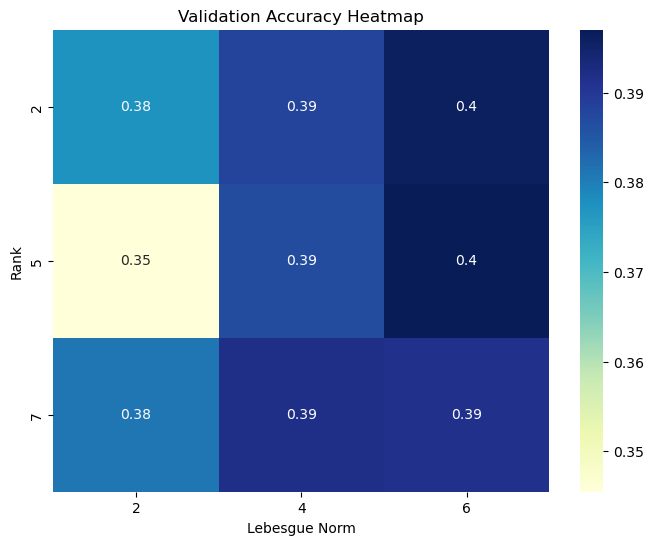

Epoch [91/100], Train Loss: 2.1811, Val Loss: 2.1720, Train Acc: 0.3865, Val Acc: 0.3815
Epoch [92/100], Train Loss: 2.1810, Val Loss: 2.1778, Train Acc: 0.3871, Val Acc: 0.3782
Epoch [93/100], Train Loss: 2.1817, Val Loss: 2.1758, Train Acc: 0.3832, Val Acc: 0.3853
Epoch [94/100], Train Loss: 2.1809, Val Loss: 2.1771, Train Acc: 0.3847, Val Acc: 0.3863
Epoch [95/100], Train Loss: 2.1815, Val Loss: 2.1738, Train Acc: 0.3866, Val Acc: 0.3915
Epoch [96/100], Train Loss: 2.1814, Val Loss: 2.1799, Train Acc: 0.3839, Val Acc: 0.3859
Epoch [97/100], Train Loss: 2.1810, Val Loss: 2.1767, Train Acc: 0.3869, Val Acc: 0.3838
Epoch [98/100], Train Loss: 2.1810, Val Loss: 2.1778, Train Acc: 0.3874, Val Acc: 0.3863
Epoch [99/100], Train Loss: 2.1814, Val Loss: 2.1792, Train Acc: 0.3836, Val Acc: 0.3829
Epoch [100/100], Train Loss: 2.1814, Val Loss: 2.1798, Train Acc: 0.3851, Val Acc: 0.3868
Unsupervised weights remained unchanged during supervised training.
Figure(1200x500)
Figure(1200x500)
Epoch [

In [7]:
# Define the parameter grid
lebesgue_norm_values = [2, 4, 6]
rank_values = [2, 5, 7]

# Fixed parameters
n_hidden = 2000
n_epochs_unsupervised = 1000
batch_size = 32
learning_rate = 0.01
precision = 1e-30
anti_hebbian_learning_strength = 0.2
skip = 1
Kx = 10
Ky = 10

# Fixed parameters for supervised learning
out_features = 10
n_epochs_supervised = 100
batch_size_supervised = 32
correct_img_bzs = 32

# Prepare a 2D array to hold accuracy values
accuracy_matrix = np.zeros((len(rank_values), len(lebesgue_norm_values)))

# Define the directory where synapse files are stored
synapse_dir = "/home/gloria/Scrivania/Physical model of living systems/Project/output/CIFAR10/"

# Function to construct the filename for the synapses
def get_synapse_filename(data_name, n_hidden, anti_hebbian_learning_strength, lebesgue_norm, rank, Kx, Ky):
    # Dizionario dei nomi dei dataset
    data_name_dict = {1: "MNIST", 2: "CIFAR10", 3: "FashionMNIST"}
    dataset_name = data_name_dict.get(data_name, "UnknownDataset")

    return os.path.join(
        synapse_dir,
        f"{dataset_name}_biolinear_hidden{n_hidden}_ahls{anti_hebbian_learning_strength}_lnorm{lebesgue_norm}.0_rank{rank}.npy"
    )

# Function to run supervised learning after loading or computing unsupervised synapses
def run_supervised(lebesgue_norm, rank):
    # Construct the filename for the current parameter combination
    synapse_file = get_synapse_filename(
        data_name, n_hidden, anti_hebbian_learning_strength, lebesgue_norm, rank, Kx, Ky
    )
    
    # Initialize synapses to None as a default
    synapses = None
    
    # Check if synapses already exist
    if os.path.exists(synapse_file):
        print(f"Loading synapses from {synapse_file}")
        synapses = torch.from_numpy( np.load(synapse_file)) 
    else:
        print(f"File {synapse_file} not found; using default or placeholder synapses.")
        # You might replace this with actual logic to initialize `synapses`
        # if it's crucial for `train_bio_classifier`.
        synapses = np.random.randn(n_hidden, out_features)  # Example placeholder

    print(torch.is_tensor(synapses))
    
    # Supervised learning phase
    train_loss_log, val_loss_log, train_acc_log, val_acc_log = train_bio_classifier(
        W_unsupervised=synapses, 
        train_loader=train_loader, 
        val_loader=test_loader, 
        correct_img_bzs=correct_img_bzs,
        data_name=data_name,
        n_hidden=n_hidden, 
        out_features=out_features, 
        n_epochs=n_epochs_supervised, 
        batch_size=batch_size_supervised,
        anti_hebbian_learning_strength=anti_hebbian_learning_strength, 
        lebesgue_norm=lebesgue_norm, 
        rank=rank
    )
    
    # Calculate final validation accuracy and return it along with parameters for logging
    final_val_accuracy = val_acc_log[-1]  # Get the last recorded validation accuracy
    return lebesgue_norm, rank, final_val_accuracy

# Prepare all parameter combinations
param_combinations = list(product(lebesgue_norm_values, rank_values))

# Run the full pipeline in parallel using 4 cores and collect the accuracy results
results = Parallel(n_jobs=10)(delayed(run_supervised)(lebesgue_norm, rank) for lebesgue_norm, rank in param_combinations)

# Populate the accuracy_matrix based on results
for lebesgue_norm, rank, final_val_accuracy in results:
    x_idx = lebesgue_norm_values.index(lebesgue_norm)
    y_idx = rank_values.index(rank)
    accuracy_matrix[y_idx, x_idx] = final_val_accuracy  # Fill in matrix with accuracy values

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    accuracy_matrix, 
    xticklabels=lebesgue_norm_values, 
    yticklabels=rank_values, 
    annot=True, 
    cmap="YlGnBu"
)
plt.xlabel("Lebesgue Norm")
plt.ylabel("Rank")
plt.title("Validation Accuracy Heatmap")
plt.savefig(f"Accuracy_{data_name}.png")
plt.show()
